In [64]:
import pandas as pd
from datetime import datetime, date
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

pd.options.display.max_rows = 20

# Load and analyze data

## Agency product name

In [2]:
df_agency = pd.read_csv("loan_agency_product_name.csv")
df_agency.head()

,AgencyId,ProductName,Country
0,1,PDL,Kamino
1,2,PDL,Kamino
2,3,PDL,Kamino
3,4,PDL,Kamino
4,5,PDL,Kamino


<AxesSubplot:title={'center':'Product Name'}>

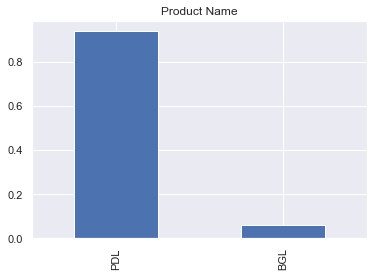

In [3]:
df_agency.ProductName.value_counts(normalize=True).plot(kind="bar", title="Product Name")

<AxesSubplot:title={'center':'Country'}>

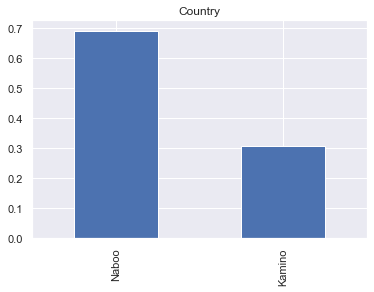

In [4]:
df_agency.Country.value_counts(normalize=True).plot(kind="bar", title="Country")

In [5]:
df_agency.AgencyId.nunique()

1131

<AxesSubplot:title={'center':'AgencyId'}>

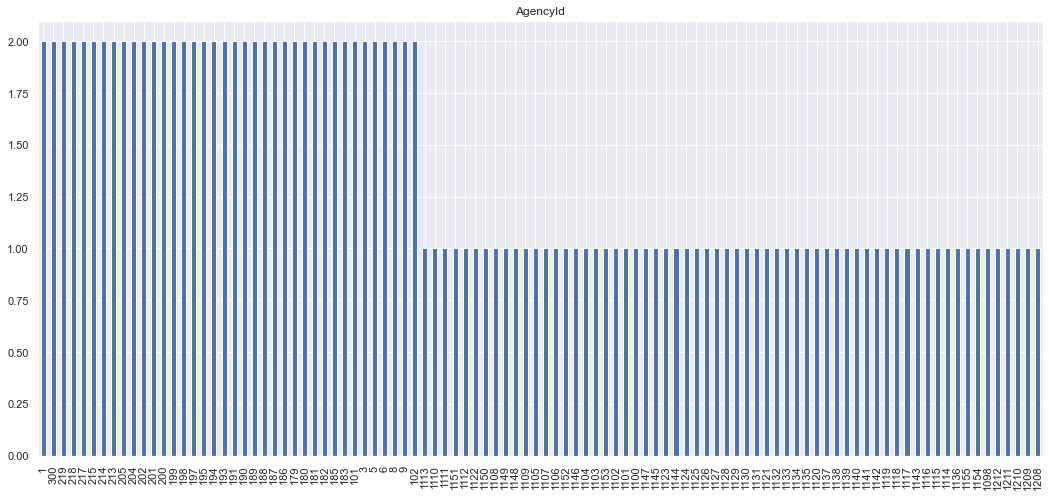

In [6]:
df_agency.AgencyId.value_counts(normalize=False).head(100).plot(kind="bar", title="AgencyId", figsize=(18,8))

## Funding Origination
- LoanId (Entero): ID único del crédito.

- AgencyId (Entero): ID de agencia (dependencia) de Hopp a la que pertenece el crédito.

- FundingID (Entero): ID de la entidad financiadora.

- OriginationDate (Datetime): Fecha de originación del crédito.

- InstallmentAmount (Decimal): Valor del préstamo (valor de la cuota correspondiente = InstallmentAmount/Term).

- Periodicity (Categórica): Periodicidad del crédito.

- LoanOperationalStatus (Categórica): Estado operacional del crédito al fin del período (diciembre 2020).

- VAT (Entero): Porcentaje asignado al IVA.

- Term (Entero): Cantidad de plazos del crédito.

In [7]:
df_orig = pd.read_csv("loan_funding_origination_info.csv", parse_dates=["OriginationDate"])
df_orig.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72
2,125505,855,6,2010-07-09,30444.96,Biweekly,Paid-off,16,48
3,125523,11,6,2010-07-08,18148.44,Biweekly,Paid-off,16,24
4,125530,806,6,2010-07-08,26830.93,Biweekly,Paid-off,11,48


In [8]:
df_orig.rename(inplace=True, columns={"InstallmentAmount":"LoanAmount"})
df_orig["InstallmentAmount"] = df_orig.LoanAmount / df_orig.Term

In [9]:
df_orig.head()

,LoanId,AgencyId,FundingID,OriginationDate,LoanAmount,Periodicity,LoanOperationalStatus,VAT,Term,InstallmentAmount
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72,367.988889
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72,349.589444
2,125505,855,6,2010-07-09,30444.96,Biweekly,Paid-off,16,48,634.270000
3,125523,11,6,2010-07-08,18148.44,Biweekly,Paid-off,16,24,756.185000
4,125530,806,6,2010-07-08,26830.93,Biweekly,Paid-off,11,48,558.977708


<AxesSubplot:title={'center':'Agency Id'}, xlabel='Agency Id', ylabel='Prop'>

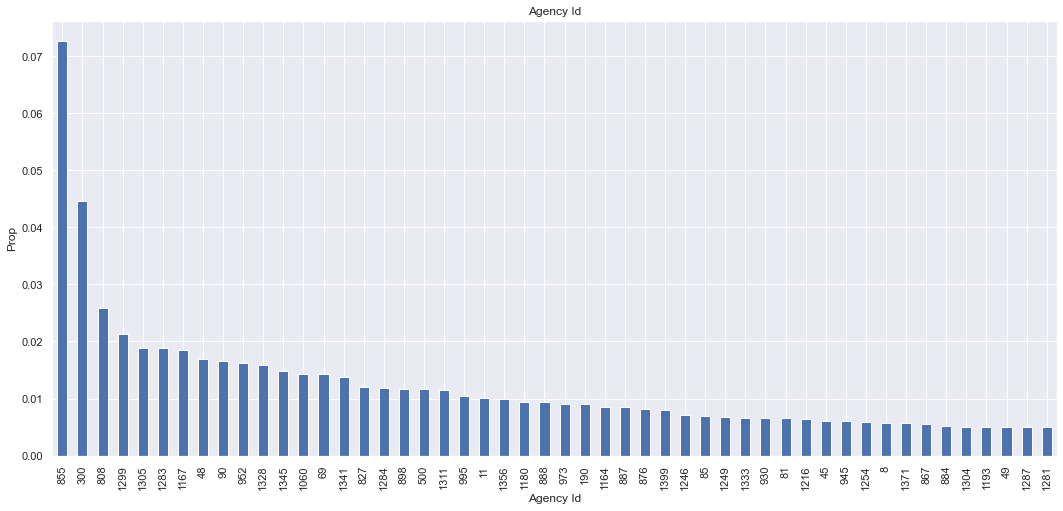

In [10]:
df_orig.AgencyId.value_counts(normalize=True).head(50).plot(kind="bar", title="Agency Id", figsize=(18,8), xlabel="Agency Id", ylabel="Prop")

<AxesSubplot:title={'center':'LoanOperationalStatus'}, xlabel='LoanOperationalStatus', ylabel='Prop'>

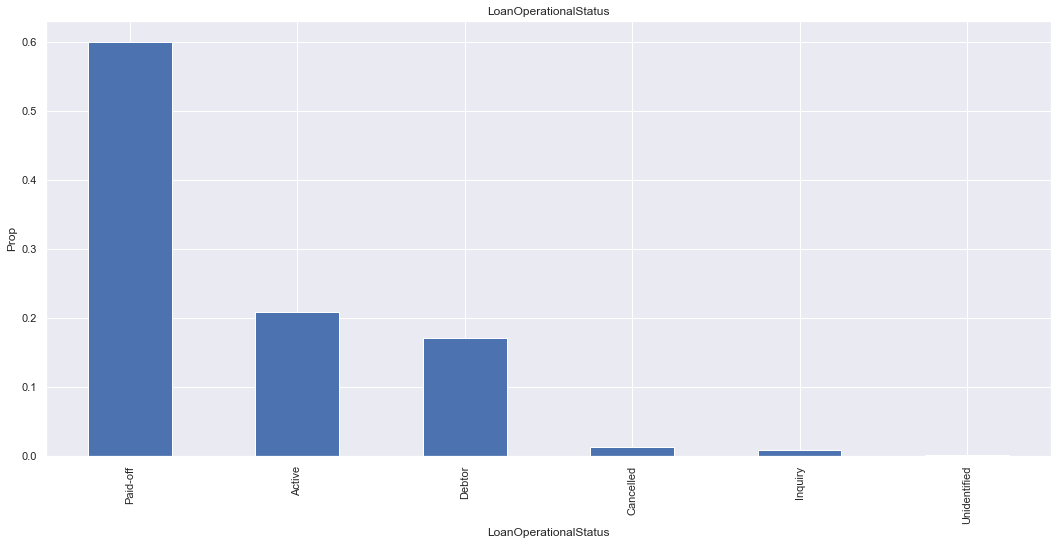

In [11]:
df_orig.LoanOperationalStatus.value_counts(normalize=True).plot(kind="bar", title="LoanOperationalStatus", figsize=(18,8), xlabel="LoanOperationalStatus", ylabel="Prop")

In [12]:
df_orig.InstallmentAmount.describe()

count    6.861640e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.939200e+02
50%      4.957389e+02
75%      8.848554e+02
max               inf
Name: InstallmentAmount, dtype: float64

<AxesSubplot:ylabel='InstallmentAmount'>

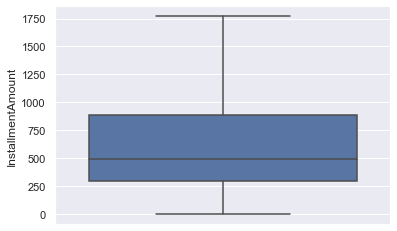

In [13]:
sns.boxplot(data=df_orig, y="InstallmentAmount", showfliers=False)

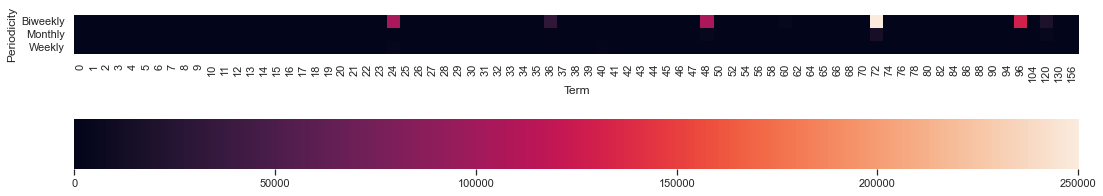

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(
    df_orig.pivot_table(index="Periodicity", columns="Term", values="LoanId", aggfunc="count", fill_value=0),
    square=True,
    cbar_kws={"orientation":"horizontal"},
)
plt.show()

## Payments

In [78]:
df_payments = pd.read_csv("loan_payments_dataset.csv", parse_dates=["PaymentProcessingDate", "PaymentTransferDate", "PaymentDueDate"])
df_payments.head()

,LoanId,PaymentId,PaymentSource,PaymentType,PaymentTypeDescription,PaymentAmount,PaymentPrincipal,PaymentInterest,PaymentVAT,PaymentDueDate,PaymentTransferDate,PaymentProcessingDate
0,303,1025244,Contractor,NaN,NaN,0.53,0.53,0.0,0.0,NaT,2019-12-31,2020-01-06
1,1326,1025245,Contractor,NaN,NaN,20.00,20.00,0.0,0.0,NaT,2019-12-31,2020-01-06
2,1763,1025246,Contractor,NaN,NaN,500.00,500.00,0.0,0.0,NaT,2019-12-31,2020-01-06
3,1829,1088920,Contractor,NaN,NaN,399.00,399.00,0.0,0.0,NaT,2020-03-11,2020-03-13
4,1884,1025247,Contractor,NaN,NaN,465.00,465.00,0.0,0.0,NaT,2019-12-31,2020-01-06


In [16]:
(df_payments.PaymentProcessingDate - df_payments.PaymentTransferDate).value_counts()

1 days      1395177
2 days       776773
4 days       678965
3 days       377098
0 days       283394
             ...   
418 days          1
309 days          1
387 days          1
399 days          1
323 days          1
Length: 301, dtype: int64

In [17]:
(df_payments[df_payments.PaymentDueDate.notna()].PaymentDueDate - df_payments[df_payments.PaymentDueDate.notna()].PaymentTransferDate).value_counts()

-7 days       228757
-5 days       227204
-10 days      193585
-9 days       186640
-6 days       184211
               ...  
218 days           1
-946 days          1
-2300 days         1
113 days           1
-298 days          1
Length: 1476, dtype: int64

## Indexed dataset

In [18]:
df_dindex = pd.read_csv("loan_dindexedto_dataset.csv")
df_dindex.head()

,LoanId,ProductName,Type,D-IndexedTo
0,387307,PDL,Base,Hopp
1,387308,PDL,Base,Hopp
2,387309,PDL,Base,Hopp
3,9270520,PDL,Base,Hopp
4,9270521,PDL,Base,Hopp


<AxesSubplot:>

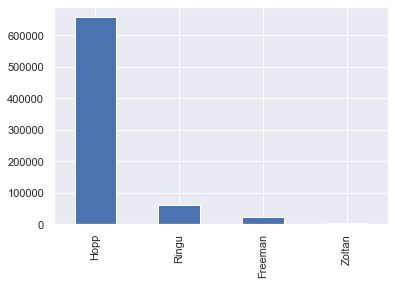

In [19]:
df_dindex["D-IndexedTo"].value_counts().plot(kind="bar")

## Predictions sample

In [20]:
predictions_sample = pd.read_csv("loan_payments_dataset_scoring.csv", names=["PaymentCode", "PaymentPrincipal"], dtype={
    "PaymentCode": str,
    "PaymentPrincipal": float
})

predictions_sample = predictions_sample.join(predictions_sample.PaymentCode.astype(str).str.extract(r'^(?P<PaymentSource>\d)(?P<PaymentTypeId>\d)(?P<Date>\d{6})(?P<LoanId>.*)'))

predictions_sample.LoanId = predictions_sample.LoanId.astype(int)
predictions_sample.PaymentSource = predictions_sample.PaymentSource.astype(int)
predictions_sample.PaymentTypeId = predictions_sample.PaymentTypeId.astype(int)

predictions_sample.Date = pd.to_datetime(predictions_sample.Date, format="%y%m%d").dt.date

predictions_sample.PaymentSource = predictions_sample.PaymentSource.map({
    0: "Regular",
    1: "Alternative",
    2: "Contractor"
})

In [21]:
predictions_sample.head()

,PaymentCode,PaymentPrincipal,PaymentSource,PaymentTypeId,Date,LoanId
0,022102049402357,NaN,Regular,2,2021-02-04,9402357
1,00201030668519,NaN,Regular,0,2020-10-30,668519
2,002011249339435,NaN,Regular,0,2020-11-24,9339435
3,002104209148631,NaN,Regular,0,2021-04-20,9148631
4,00210607131505,NaN,Regular,0,2021-06-07,131505


In [22]:
orig_loanids = set(df_orig.LoanId.unique())
predictions_loanids = set(predictions_sample.LoanId.unique())
print(f"All predictions in payments? {(orig_loanids & predictions_loanids) == predictions_loanids}. Diff: {len(predictions_loanids - orig_loanids)}")

All predictions in payments? False. Diff: 5


In [23]:
predictions_sample[~predictions_sample.LoanId.isin(df_orig.LoanId)]

,PaymentCode,PaymentPrincipal,PaymentSource,PaymentTypeId,Date,LoanId
7928,002110295405,NaN,Regular,0,2021-10-29,5405
50127,002112285406,NaN,Regular,0,2021-12-28,5406
944338,002110225404,NaN,Regular,0,2021-10-22,5404
1109375,002112305409,NaN,Regular,0,2021-12-30,5409
1116352,002107205403,NaN,Regular,0,2021-07-20,5403
1220610,002107235403,NaN,Regular,0,2021-07-23,5403


In [24]:
loan_ids_to_predict = predictions_sample.LoanId.unique()

<AxesSubplot:>

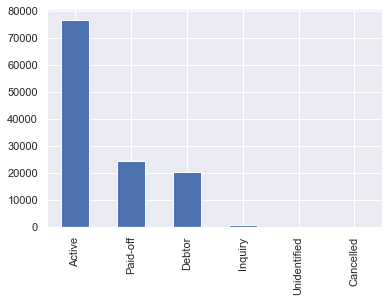

In [25]:
df_orig[df_orig.LoanId.isin(loan_ids_to_predict)].LoanOperationalStatus.value_counts().plot(kind="bar")

In [26]:
predictions_sample.LoanId.value_counts()

653139     64
9361293    64
9275791    59
9343898    59
9359087    59
           ..
9143458     1
9145866     1
519749      1
9279168     1
9153809     1
Name: LoanId, Length: 122351, dtype: int64

In [81]:
predictions_sample.sample(20)

,PaymentCode,PaymentPrincipal,PaymentSource,PaymentTypeId,Date,LoanId
584367,002009309391134,NaN,Regular,0,2020-09-30,9391134
366933,002009119383157,NaN,Regular,0,2020-09-11,9383157
1329261,002110299084163,NaN,Regular,0,2021-10-29,9084163
561003,002104309154018,NaN,Regular,0,2021-04-30,9154018
1738256,002104129362662,NaN,Regular,0,2021-04-12,9362662
1781717,00201126633976,NaN,Regular,0,2020-11-26,633976
1216913,002009249356568,NaN,Regular,0,2020-09-24,9356568
301723,002008109411599,NaN,Regular,0,2020-08-10,9411599
1236787,002009089362291,NaN,Regular,0,2020-09-08,9362291
419992,002104219361382,NaN,Regular,0,2021-04-21,9361382


In [82]:
df_payments[df_payments.LoanId == 9374290]

,LoanId,PaymentId,PaymentSource,PaymentType,PaymentTypeDescription,PaymentAmount,PaymentPrincipal,PaymentInterest,PaymentVAT,PaymentDueDate,PaymentTransferDate,PaymentProcessingDate
3258463,9374290,40772989,Regular,NaN,NaN,1036.99,375.57,570.19,91.23,2019-01-15,2019-01-23,2019-01-24
3258464,9374290,40926286,Regular,NaN,NaN,1036.99,375.57,570.19,91.23,2019-01-31,2019-02-15,2019-02-20
3258465,9374290,41007023,Regular,NaN,NaN,1036.99,375.57,570.19,91.23,2019-02-15,2019-02-22,2019-02-26
3258466,9374290,41152049,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2019-02-28,2019-03-11,2019-03-13
3258467,9374290,41284033,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2019-03-15,2019-03-26,2019-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...
3258493,9374290,44421312,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2020-04-15,2020-04-23,2020-04-24
3258494,9374290,44646093,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2020-04-30,2020-05-11,2020-05-26
3258495,9374290,44649666,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2020-05-15,2020-05-22,2020-05-26
3258496,9374290,44767656,Regular,NaN,NaN,1053.60,382.86,578.22,92.52,2020-05-31,2020-06-10,2020-06-11


# Cross reference payments and origin

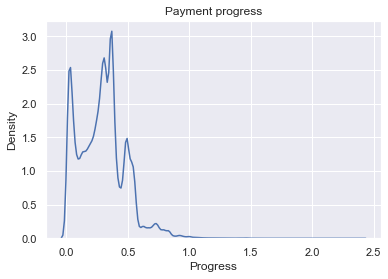

In [27]:
df = df_orig.merge(
    df_payments.LoanId.value_counts().rename("PaymentsRegistered"),
    left_on="LoanId",
    right_index=True
)
df["Progress"] = df.PaymentsRegistered / df.Term
sns.kdeplot(df[np.isfinite(df.Progress)].Progress)
plt.title("Payment progress")
plt.show()

# Do we need to predict for wanky loans?

In [28]:
predictions_sample.LoanId.isin(
    df_orig[df_orig.Term == 0].LoanId
).nunique()

2

# Massage data

Durante la vida del préstamo pueden ocurrir los siguientes escenarios:

- El prestatario paga al día la totalidad de cuotas del préstamo y éste se considera pagado.
- El préstamo entra en **mora**, cuando se atrasan los pagos consecutivamente y el **último pago registrado fue hace menos de 180 días**
- El préstamo se considera **perdido luego de 180 días sin pagos registrados**.

In [31]:
from pandarallel import pandarallel
from dateutil.relativedelta import relativedelta

pandarallel.initialize(progress_bar=True, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [36]:
%%time

def generate_installment_dates(row):
    periodicity = row.Periodicity
    deltas_periodicity = {
        "Biweekly": relativedelta(weeks=2),
        "Weekly": relativedelta(weeks=2),
        "Monthly": relativedelta(months=1)
    }
    if periodicity not in deltas_periodicity:
        return []
    
    delta_periodicity = deltas_periodicity[periodicity]
    
    orig_date = row.OriginationDate
    terms = row.Term
    
    dates = []
    curr = orig_date
    for _ in range(terms):
        curr += delta_periodicity
        dates.append(curr.date())
    
    return dates

df_orig["DueDates"] = df_orig.parallel_apply(generate_installment_dates, axis=1)

CPU times: user 17 s, sys: 3.03 s, total: 20.1 s
Wall time: 1min 25s


In [39]:
df_installments = df_orig.explode("DueDates")

In [46]:
df_installments.rename(columns={"DueDates": "DueDate"}, inplace=True)
df_installments.DueDate = pd.to_datetime(df_installments.DueDate)

In [60]:
df_installments = df_installments[df_installments.DueDate.between(df_payments.PaymentProcessingDate.min(), df_payments.PaymentProcessingDate.max())]

In [47]:
df_installments.dtypes

LoanId                            int64
AgencyId                          int64
FundingID                         int64
OriginationDate          datetime64[ns]
LoanAmount                      float64
Periodicity                      object
LoanOperationalStatus            object
VAT                               int64
Term                              int64
InstallmentAmount               float64
DueDate                  datetime64[ns]
dtype: object

In [48]:
df_payments.dtypes

LoanId                             int64
PaymentId                          int64
PaymentSource                     object
PaymentType                      float64
PaymentTypeDescription            object
PaymentAmount                    float64
PaymentPrincipal                 float64
PaymentInterest                  float64
PaymentVAT                       float64
PaymentDueDate            datetime64[ns]
PaymentTransferDate       datetime64[ns]
PaymentProcessingDate     datetime64[ns]
dtype: object

In [61]:
df_payments.PaymentDueDate.isna().value_counts(normalize=True) * 100.

False    92.052828
True      7.947172
Name: PaymentDueDate, dtype: float64

In [75]:
example = df_payments[df_payments.LoanId.isin(
    df_payments[df_payments.PaymentDueDate.notna()].LoanId.value_counts().head(20).sample().index
)]
example.sort_values("PaymentDueDate").head(20)

,LoanId,PaymentId,PaymentSource,PaymentType,PaymentTypeDescription,PaymentAmount,PaymentPrincipal,PaymentInterest,PaymentVAT,PaymentDueDate,PaymentTransferDate,PaymentProcessingDate
2158650,9170073,40615245,Regular,NaN,NaN,37.92,0.0,32.69,5.23,2018-12-15,2018-12-31,2019-01-04
2158651,9170073,40615272,Regular,NaN,NaN,42.37,0.0,36.53,5.84,2018-12-31,2018-12-31,2019-01-04
2158652,9170073,40902317,Regular,NaN,NaN,26.91,0.0,23.20,3.71,2019-01-15,2019-02-11,2019-02-18
2158653,9170073,40902867,Regular,NaN,NaN,55.19,0.0,47.57,7.61,2019-01-15,2019-01-22,2019-02-18
2158654,9170073,40908771,Regular,NaN,NaN,42.56,0.0,36.69,5.87,2019-01-15,2019-02-11,2019-02-19
2158655,9170073,40903469,Regular,NaN,NaN,26.91,0.0,23.20,3.71,2019-01-31,2019-02-11,2019-02-18
2158656,9170073,40904013,Regular,NaN,NaN,57.78,0.0,49.81,7.97,2019-01-31,2019-02-11,2019-02-18
2158657,9170073,40908803,Regular,NaN,NaN,39.96,0.0,34.45,5.51,2019-01-31,2019-02-12,2019-02-19
2158658,9170073,41017373,Regular,NaN,NaN,38.20,0.0,32.93,5.27,2019-02-15,2019-02-18,2019-02-27
2158659,9170073,41017013,Regular,NaN,NaN,59.54,0.0,51.33,8.21,2019-02-15,2019-02-21,2019-02-27


In [77]:
df_orig[df_orig.LoanId == 9170073]

,LoanId,AgencyId,FundingID,OriginationDate,LoanAmount,Periodicity,LoanOperationalStatus,VAT,Term,InstallmentAmount,DueDates
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,"[2016-03-02, 2016-04-02, 2016-05-02, 2016-06-0..."


In [76]:
df_installments[df_installments.LoanId.isin(example.LoanId.unique())].sort_values("DueDate")

,LoanId,AgencyId,FundingID,OriginationDate,LoanAmount,Periodicity,LoanOperationalStatus,VAT,Term,InstallmentAmount,DueDate
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-01-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-02-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-03-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-04-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-05-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-06-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-07-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-08-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-09-02
550887,9170073,1170,491,2016-02-02,11966.4,Monthly,Active,16,96,124.65,2019-10-02


In [51]:
merged_data = pd.merge_asof(
    df_installments.sort_values("LoanId"),
    df_payments.sort_values("LoanId"),
    on="LoanId",
    left_by="DueDate",
    right_by="PaymentProcessingDate",
    direction="forward"
)

KeyboardInterrupt: 

In [ ]:
merged_data[merged_data.]